### Word Embeddings Solution

###### Author: Alex Sherman | alsherman@deloitte.com


##### Agenda
- Word2Vec (cbow, skig-gram, fasttext)
- Doc2Vec

In [1]:
from configparser import ConfigParser, ExtendedInterpolation

import gensim
from IPython.core.display import display, HTML
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

config = ConfigParser(interpolation=ExtendedInterpolation())
config.read('../../config.ini')
CLEANED_TEXT_PATH = config['NLP']['CLEANED_TEXT_PATH']
PUBMED_DATA = config['NLP']['PUBMED_DATA']
EVALUATION = config['EMBEDDINGS']['QUESTION_WORDS']
PRETRAINED_BIOMEDICAL_EMBEDDINGS = config['EMBEDDINGS']['PRETRAINED_BIOMEDICAL_EMBEDDINGS']
SAVED_EMBEDDINGS_PATH = config['EMBEDDINGS']['SAVED_EMBEDDINGS_PATH']
DOC2VEC_SAVED_EMBEDDINGS_PATH = config['EMBEDDINGS']['DOC2VEC_SAVED_EMBEDDINGS_PATH']
#REPORTER_PATH = config['EMBEDDINGS']['REPORTER_PATH']
REPORTER_ZIP_PATH = config['EMBEDDINGS']['REPORTER_ZIP_PATH']

C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Word embedding
"Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with much higher dimension.

Methods to generate this mapping include neural networks, dimensionality reduction on the word co-occurrence matrix, probabilistic models, and explicit representation in terms of the context in which words appear.

Word and phrase embeddings, when used as the underlying input representation, have been shown to boost the performance in NLP tasks such as syntactic parsing and sentiment analysis."

##### There are many techniques to create Word Embeddings. Some of the popular ones are:

- Binary Encoding
- TF Encoding
- TF-IDF Encoding
- Latent Semantic Analysis Encoding
- Topic Modeling
- Word2Vec Encoding

##### Why do we need Word Embeddings?
"Many machine learning algorithms and almost all Deep Learning Architectures are incapable of processing strings or plain text in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression etc. in broad terms. And with the huge amount of data that is present in the text format, it is imperative to extract knowledge out of it and build applications."

"So a natural language modelling technique like Word Embedding is used to map words or phrases from a vocabulary to a corresponding vector of real numbers. As well as being amenable to processing by ML algorithms, this vector representation has two important and advantageous properties:

- **Dimensionality Reduction** - it is a more efficient representation
- **Contextual Similarity** - it is a more expressive representation"

### Techniques (Count versus Predictive)
Count-based methods compute the statistics of how often some word co-occurs with its neighbor words in a large text corpus, and then map these count-statistics down to a small, dense vector for each word. Predictive models directly try to predict a word from its neighbors in terms of learned small, dense embedding vectors (considered parameters of the model)."

##### Word2Vec
Word2Vec is a more recent model that embeds words in a lower-dimensional vector space using a shallow neural network. The result is a set of word-vectors where vectors close together in vector space have similar meanings based on context, and word-vectors distant to each other have differing meanings. For example, strong and powerful would be close together and strong and Paris would be relatively far. There are two versions of this model based on skip-grams (SG) and continuous-bag-of-words (CBOW), both implemented by the gensim Word2Vec class.

Word2Vec uses a trick you may have seen elsewhere in machine learning. We’re going to train a simple neural network with a single hidden layer to perform a certain task, but then we’re not actually going to use that neural network for the task we trained it on! Instead, the goal is actually just to learn the weights of the hidden layer–we’ll see that these weights are actually the “word vectors” that we’re trying to learn.

The network is going to learn the statistics from the number of times each pairing shows up. So, for example, the network is probably going to get many more training samples of (“Soviet”, “Union”) than it is of (“Soviet”, “Sasquatch”). When the training is finished, if you give it the word “Soviet” as input, then it will output a much higher probability for “Union” or “Russia” than it will for “Sasquatch”.

##### Word2Vec - Skip-gram Model
The skip-gram word2vec model, for example, takes in pairs (word1, word2) generated by moving a window across text data, and trains a 1-hidden-layer neural network based on the synthetic task of given an input word, giving us a predicted probability distribution of nearby words to the input. A virtual one-hot encoding of words goes through a 'projection layer' to the hidden layer; these projection weights are later interpreted as the word embeddings. So if the hidden layer has 300 neurons, this network will give us 300-dimensional word embeddings.

##### Word2Vec - Continuous-bag-of-words Model
Continuous-bag-of-words Word2vec is very similar to the skip-gram model. It is also a 1-hidden-layer neural network. The synthetic training task now uses the average of multiple input context words, rather than a single word as in skip-gram, to predict the center word. Again, the projection weights that turn one-hot words into averageable vectors, of the same width as the hidden layer, are interpreted as the word embeddings.

SOURCE: 
- https://en.wikipedia.org/wiki/Word_embedding
- [An Intuitive Understanding of Word Embeddings: From Count Vectors to Word2Vec](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)
- [What is word embedding in deep learning?](https://www.quora.com/What-is-word-embedding-in-deep-learning)
- [How to Develop Word Embeddings in Python with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)
- [Advances in Pre-Training Distributed Word Representations](https://arxiv.org/pdf/1712.09405.pdf)
- [Vector Representations of Words](https://www.tensorflow.org/tutorials/word2vec)
- [Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

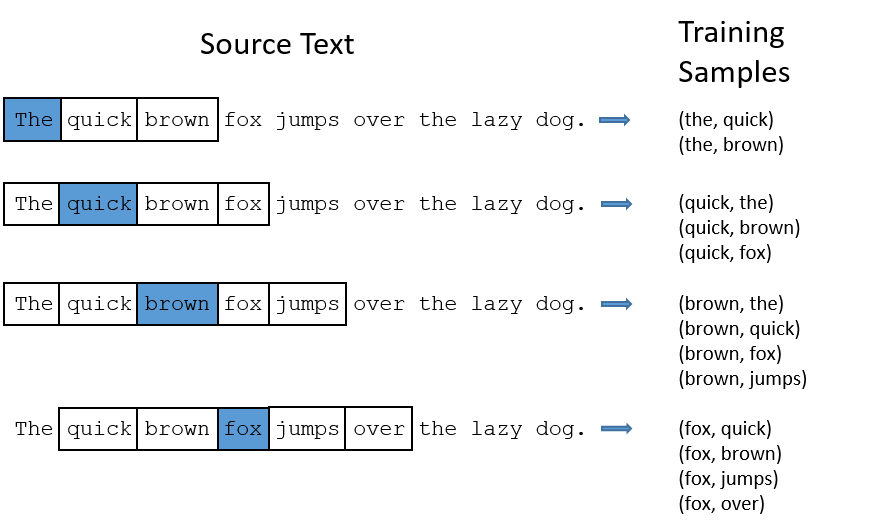

In [2]:
# Word2Vec Window
Image("../../raw_data/images/w2v_window.png", width=600)

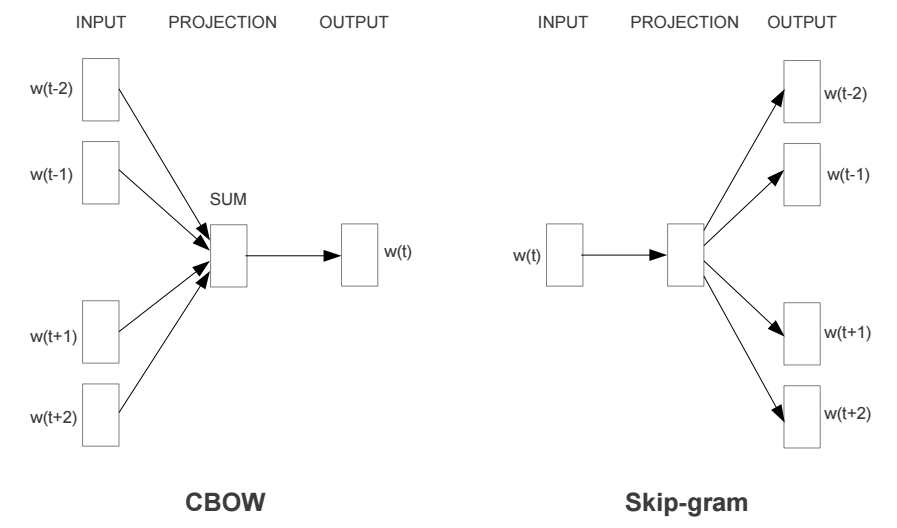

In [3]:
# Document and Word Vectors
Image("../../raw_data/images/word2vec_approaches.png", width=600)

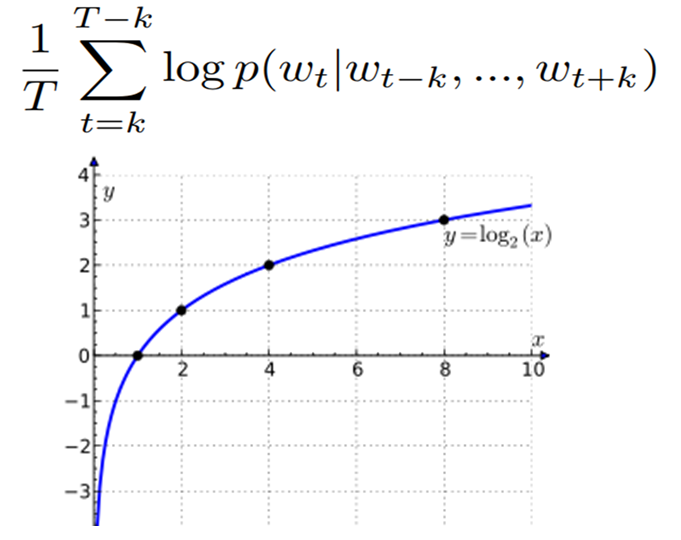

In [4]:
# Word2Vec Equations
Image("../../raw_data/images/w2v_equation.png", width=600)

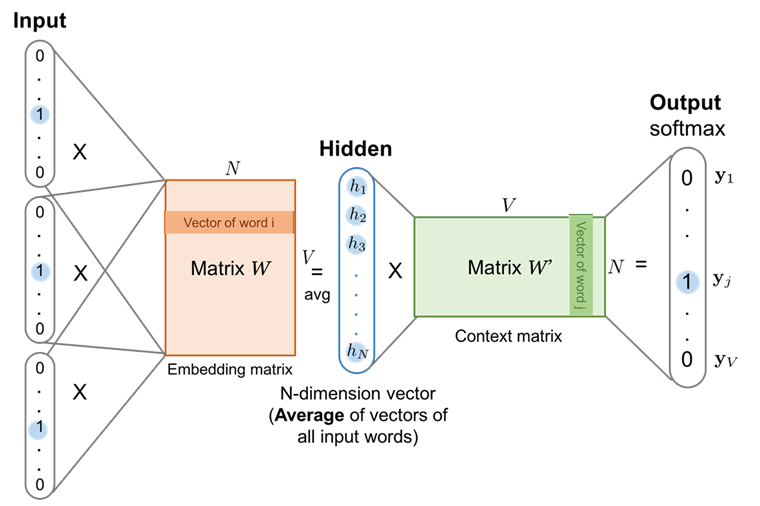

In [5]:
# Shallow Neural Net
Image("../../raw_data/images/shallow_net.png", width=600)

##### Input
When training this network on word pairs, the input is a one-hot vector representing the input word and the training output is also a one-hot vector representing the output word. But when you evaluate the trained network on an input word, the output vector will actually be a probability distribution (i.e., a bunch of floating point values, not a one-hot vector).

##### The Hidden Layer
For our example, we’re going to say that we’re learning word vectors with 300 features. So the hidden layer is going to be represented by a weight matrix with 10,000 rows (one for every word in our vocabulary) and 300 columns (one for every hidden neuron).

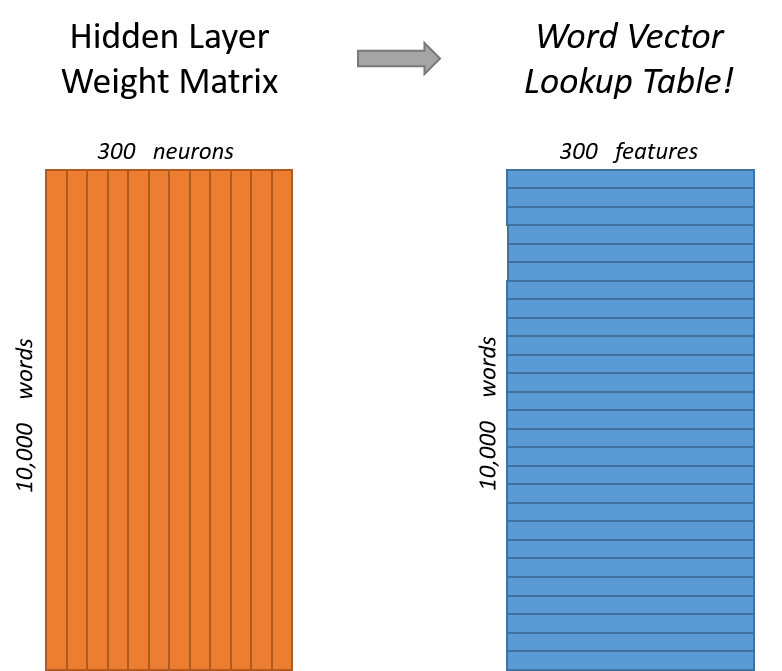

In [6]:
# Word2Vec Hidden Layer
Image("../../raw_data/images/word2vec_hidden_layer.png", width=400)

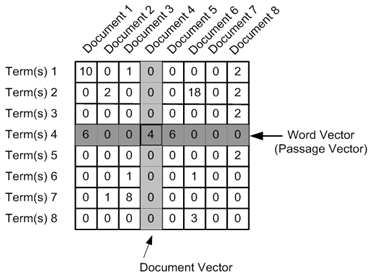

In [7]:
# Document and Word Vectors
Image("../../raw_data/images/word_vector.png", width=400)

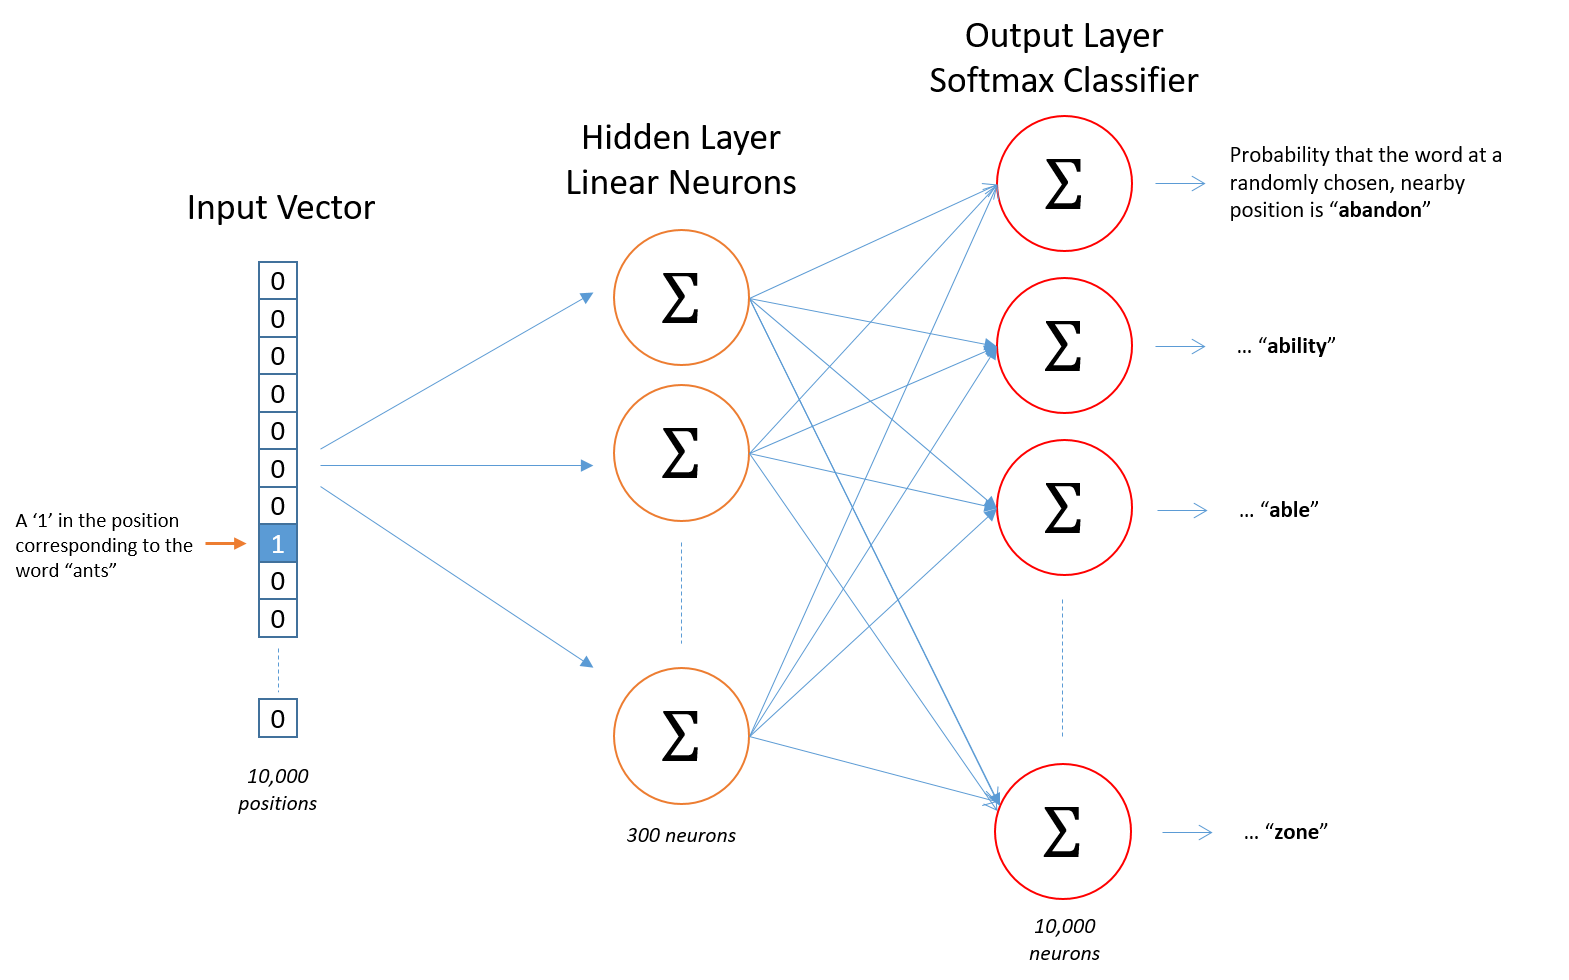

In [8]:
# Word2Vec Architecture
Image("../../raw_data/images/w2v_architecture.png", width=600)

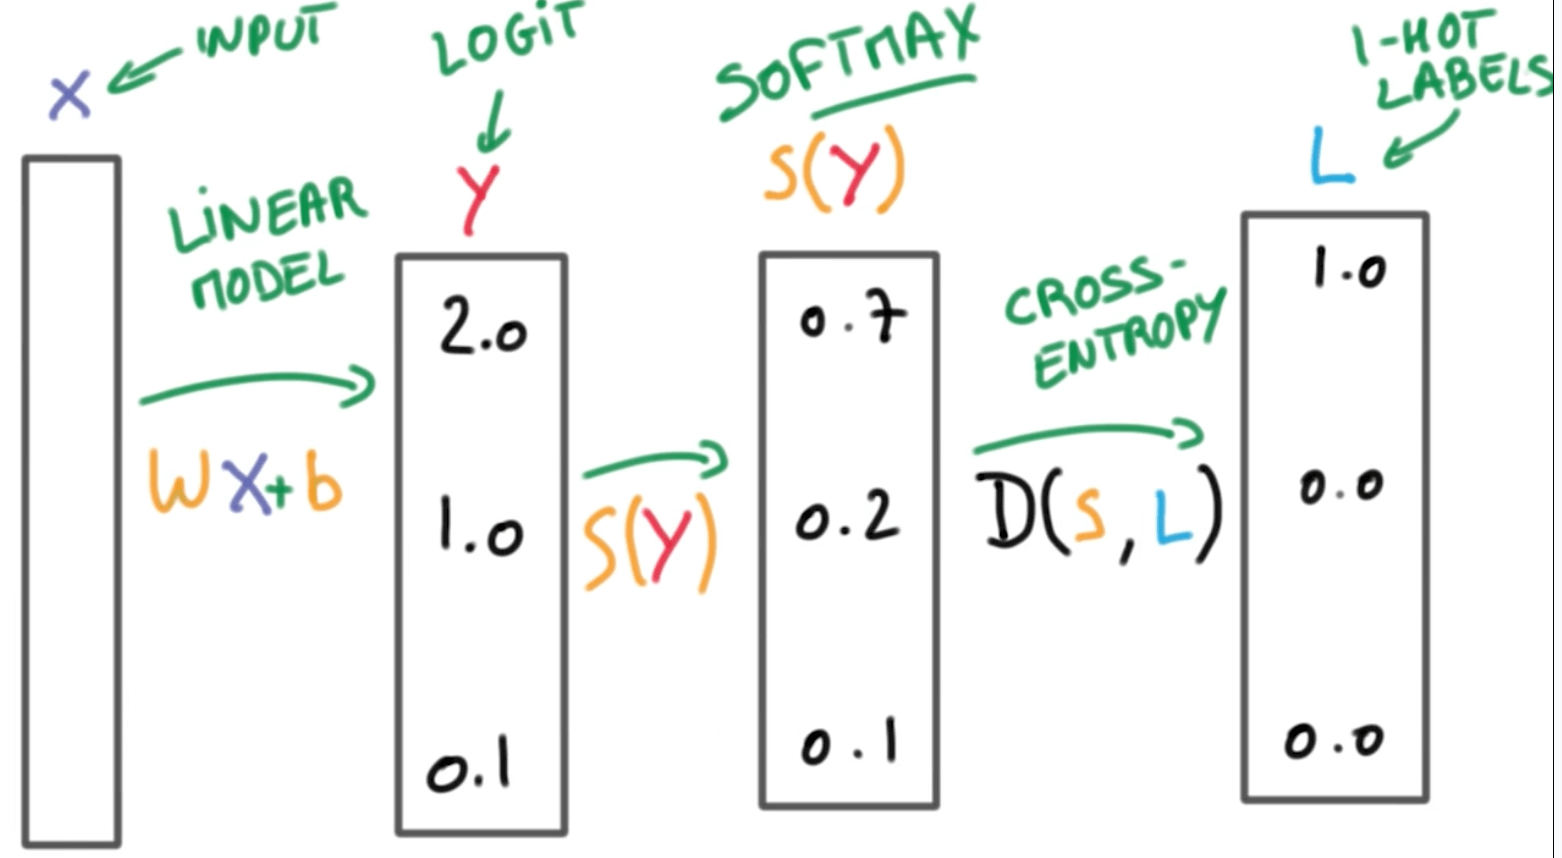

In [9]:
# Multinomial Logistic Regression
Image("../../raw_data/images/multinomial_logistic_regression.png", width=600)

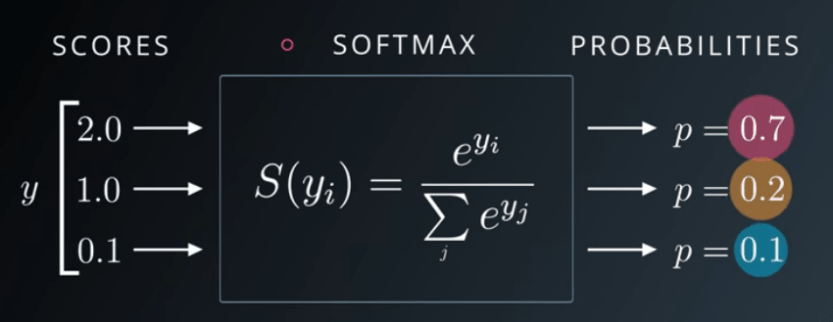

In [10]:
# Softmax
Image("../../raw_data/images/softmax.png", width=600)

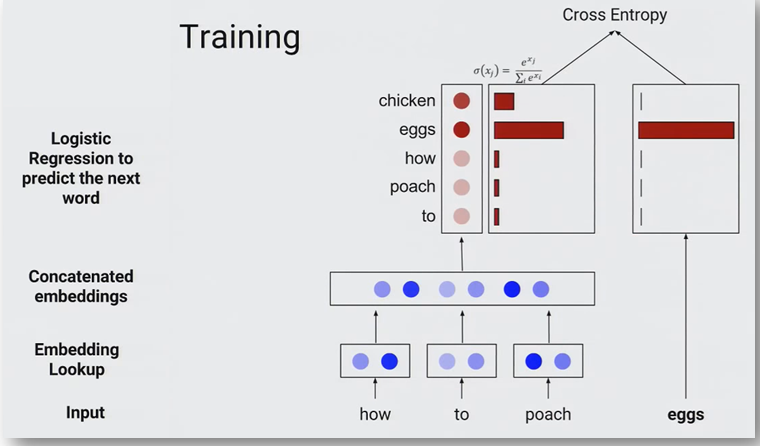

In [11]:
# Word2Vec Architecture
Image("../../raw_data/images/cross_entropy.png", width=600)

##### Cross Entropy

In a linear model, we have a scalar prediction, thus we can use an evaluation metric like MSE to evaluate the model.

When you’re using softmax, however, your output is a vector. One vector is the probability values from the output units. You can also express your data labels as a vector using what’s called one-hot encoding.

This just means that you have a vector the length of the number of classes, and the label element is marked with a 1 while the other labels are set to 0.

y=[0,0,0,0,1,0,0,0,0,0]

And our output prediction vector could be something like

y^=[0.047,0.048,0.061,0.07,0.330,0.062,0.001,0.213,0.013,0.150].

We want our error to be proportional to how far apart these vectors are. To calculate this distance, we’ll use the cross entropy. Then, our goal when training the network is to make our prediction vectors as close as possible to the label vectors by minimizing the cross entropy.

SOURCE: https://towardsdatascience.com/deep-learning-concepts-part-1-ea0b14b234c8

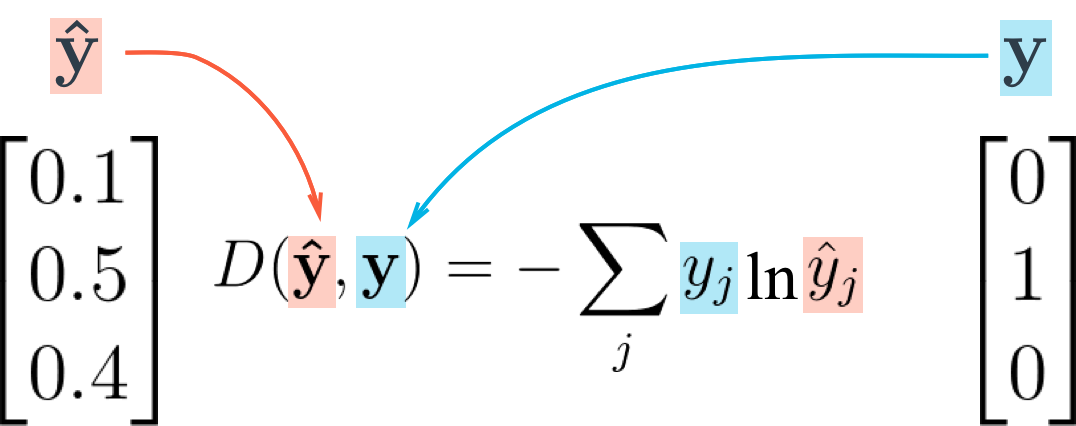

In [12]:
# Cross Entropy Example
Image("../../raw_data/images/cross_entropy_example.png", width=600)

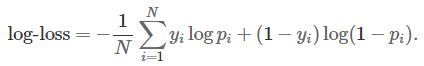

In [13]:
# Log Loss (i.e. binary cross entropy)
Image("../../raw_data/images/log_loss.png", width=600)

##### Distributed Representations of Words and Phrases and their Compositionality

There are three innovations in this second paper:

- Treating common word pairs or phrases as single “words” in their model.
- Subsampling frequent words to decrease the number of training examples.
- Modifying the optimization objective with a technique they called “Negative Sampling”, which causes each training sample to update only a small percentage of the model’s weights.

##### Phrases
Each passonly looks at combinations of 2 words, but you can run it multiple times to get longer phrases. So, the first pass will pick up the phrase “New_York”, and then running it again will pick up “New_York_City” as a combination of “New_York” and “City”.

##### Subsampling
Word2Vec implements a “subsampling” scheme to address this. For each word we encounter in our training text, there is a chance that we will effectively delete it from the text. The probability that we cut the word is related to the word’s frequency.

If we have a window size of 10, and we remove a specific instance of “the” from our text:

As we train on the remaining words, “the” will not appear in any of their context windows.
We’ll have 10 fewer training samples where “the” is the input word.

##### Negative Sampling 
Training a neural network means taking a training example and adjusting all of the neuron weights slightly so that it predicts that training sample more accurately. In other words, each training sample will tweak all of the weights in the neural network.

As we discussed above, the size of our word vocabulary means that our skip-gram neural network has a tremendous number of weights, all of which would be updated slightly by every one of our billions of training samples!

Negative sampling addresses this by having each training sample only modify a small percentage of the weights, rather than all of them. Here’s how it works.

When training the network on the word pair (“fox”, “quick”), recall that the “label” or “correct output” of the network is a one-hot vector. That is, for the output neuron corresponding to “quick” to output a 1, and for all of the other thousands of output neurons to output a 0.

With negative sampling, we are instead going to randomly select just a small number of “negative” words (let’s say 5) to update the weights for. (In this context, a “negative” word is one for which we want the network to output a 0 for). We will also still update the weights for our “positive” word (which is the word “quick” in our current example).


SOURCE:
- [Distributed Representations of Words and Phrases and their Compositionality:](https://arxiv.org/pdf/1310.4546.pdf)

### Train Embeddings

In [14]:
corpus = [
  'Text of the first document.',
  'Text of the second document made longer.',
  'Number three.',
  'This is number four.',
]

# we need to pass splitted sentences to the model
tokenized_sentences = [sentence.split() for sentence in corpus]
tokenized_sentences

[['Text', 'of', 'the', 'first', 'document.'],
 ['Text', 'of', 'the', 'second', 'document', 'made', 'longer.'],
 ['Number', 'three.'],
 ['This', 'is', 'number', 'four.']]

In [15]:
# build a word2vec model
model = gensim.models.Word2Vec(tokenized_sentences, min_count=1)
print(model)

Word2Vec(vocab=15, size=100, alpha=0.025)


In [16]:
import logging

# add logging to view training info from gensim
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [17]:
# build a word2vec model with logging turned on
model = gensim.models.Word2Vec(tokenized_sentences, min_count=1)
print(model)

2018-12-05 17:20:23,591 : INFO : collecting all words and their counts
2018-12-05 17:20:23,595 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-12-05 17:20:23,597 : INFO : collected 15 word types from a corpus of 18 raw words and 4 sentences
2018-12-05 17:20:23,600 : INFO : Loading a fresh vocabulary
2018-12-05 17:20:23,601 : INFO : effective_min_count=1 retains 15 unique words (100% of original 15, drops 0)
2018-12-05 17:20:23,616 : INFO : effective_min_count=1 leaves 18 word corpus (100% of original 18, drops 0)
2018-12-05 17:20:23,620 : INFO : deleting the raw counts dictionary of 15 items
2018-12-05 17:20:23,626 : INFO : sample=0.001 downsamples 15 most-common words
2018-12-05 17:20:23,632 : INFO : downsampling leaves estimated 2 word corpus (13.6% of prior 18)
2018-12-05 17:20:23,637 : INFO : estimated required memory for 15 words and 100 dimensions: 19500 bytes
2018-12-05 17:20:23,638 : INFO : resetting layer weights
2018-12-05 17:20:23,644 : INFO :

Word2Vec(vocab=15, size=100, alpha=0.025)


### Streaming Big Data for Embeddings 

Source: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/word2vec.ipynb

Let’s assume there are millions of documents in the corpus. Storing all of them in RAM won’t do. Instead, let’s assume the documents are stored in a file on disk, one document per line. Gensim only requires that a corpus be able to return one document vector at a time.

In [18]:
# text file of pubmed data (each line has one publication title and/or abstract)
PUBMED_DATA

'C:\\Users\\alsherman\\Desktop\\NLP\\nlp_practicum_health\\raw_data/pubmed/pubmed_data.txt'

##### Python fundamentals - you can only iterate through an open file once

In [19]:
# open a file (read mode)
f = open(PUBMED_DATA, 'r')

# iterate through the file and print the first line
for ind, line in enumerate(f):
    if ind < 5:
        print(line)

acid base diagrams

immunising against receptors for antigen

immune complexes in rheumatic disease

loss of hla antigens associated with hormonal state

hypocalcaemia after thyroidectomy



In [20]:
# reopen the file
f = open(PUBMED_DATA, 'r')

for ind, line in enumerate(f):
    if ind < 3:
        print(line)
        f.__next__()  # call the next line on the iterator

acid base diagrams

immune complexes in rheumatic disease

hypocalcaemia after thyroidectomy



In [21]:
# do not open the file again and attempt to print the lines
# this provides no output as you cannot iterate through a file more than once

for line in f:
    print(line)

##### Create a class with an __iter__ method to allow multiple passes through the text


##### gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
- Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long.

In [22]:
from smart_open import smart_open, os

class MySentences(object):

    def __init__(self, fname):
        self.fname = fname
     
    # __iter__ allows multiple iterations of an open file
    def __iter__(self):
        for line in smart_open(self.fname, 'r'):
            yield gensim.utils.simple_preprocess(line)  # similar to line.split()

In [23]:
# a memory-friendly iterator
sentences = MySentences(PUBMED_DATA)

In [24]:
# load one vector into memory at a time
for vector in sentences:
    print(vector)
    break

['acid', 'base', 'diagrams']


### word2Vec Hyperparameters

- **size:** (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
- **window:** (default 5) The maximum distance between a target word and words around the target word.
- **min_count:** (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- **sg:** (default 0) The training algorithm, either CBOW (0) or skip gram (1).

In [31]:
# build the same model, making the 2 steps explicit
# start with an empty model, no training occurs yet

new_model = gensim.models.Word2Vec(
      size=300
    , window=5
    , min_count=5
    , sg=1
)

In [32]:
%%time

# learn the vocabulary
new_model.build_vocab(sentences)

2018-12-05 17:24:46,814 : INFO : collecting all words and their counts
2018-12-05 17:24:46,818 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-12-05 17:24:47,208 : INFO : PROGRESS: at sentence #10000, processed 188692 words, keeping 14156 word types
2018-12-05 17:24:47,608 : INFO : PROGRESS: at sentence #20000, processed 377394 words, keeping 19984 word types
2018-12-05 17:24:48,190 : INFO : PROGRESS: at sentence #30000, processed 561041 words, keeping 24222 word types
2018-12-05 17:24:48,650 : INFO : PROGRESS: at sentence #40000, processed 742131 words, keeping 27881 word types
2018-12-05 17:24:49,069 : INFO : PROGRESS: at sentence #50000, processed 917494 words, keeping 31071 word types
2018-12-05 17:24:49,448 : INFO : PROGRESS: at sentence #60000, processed 1103262 words, keeping 34032 word types
2018-12-05 17:24:49,997 : INFO : PROGRESS: at sentence #70000, processed 1293542 words, keeping 36667 word types
2018-12-05 17:24:50,409 : INFO : PROGRESS: a

Wall time: 25.9 s


In [27]:
print('epochs: {}'.format(new_model.epochs))  # if error, change to new_model.iter (old version)
print('corpus count: {}'.format(new_model.corpus_count))

epochs: 5
corpus count: 500000


In [28]:
%%time

# train the model
new_model.train(
      sentences
    , total_examples=new_model.corpus_count
    , epochs=new_model.epochs  # if error, change to new_model.iter (old version)
)

2018-12-05 17:20:53,030 : INFO : training model with 3 workers on 35086 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
2018-12-05 17:20:54,075 : INFO : EPOCH 1 - PROGRESS: at 2.01% examples, 140721 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:20:55,106 : INFO : EPOCH 1 - PROGRESS: at 3.82% examples, 133034 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:20:56,139 : INFO : EPOCH 1 - PROGRESS: at 5.85% examples, 135753 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:20:57,150 : INFO : EPOCH 1 - PROGRESS: at 7.73% examples, 133903 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:20:58,242 : INFO : EPOCH 1 - PROGRESS: at 9.22% examples, 124873 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:20:59,246 : INFO : EPOCH 1 - PROGRESS: at 11.41% examples, 129380 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:21:00,288 : INFO : EPOCH 1 - PROGRESS: at 13.54% examples, 132018 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:21:01,406 : INFO : EPOCH 1 - PROGRESS: at 15.31% e

2018-12-05 17:22:04,847 : INFO : EPOCH 2 - PROGRESS: at 30.03% examples, 116528 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:22:05,944 : INFO : EPOCH 2 - PROGRESS: at 31.65% examples, 116288 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:22:06,993 : INFO : EPOCH 2 - PROGRESS: at 33.91% examples, 118536 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:22:08,125 : INFO : EPOCH 2 - PROGRESS: at 36.19% examples, 120097 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:22:09,164 : INFO : EPOCH 2 - PROGRESS: at 37.94% examples, 120356 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:22:10,214 : INFO : EPOCH 2 - PROGRESS: at 39.85% examples, 121157 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:22:11,218 : INFO : EPOCH 2 - PROGRESS: at 42.11% examples, 123032 words/s, in_qsize 1, out_qsize 0
2018-12-05 17:22:12,270 : INFO : EPOCH 2 - PROGRESS: at 44.48% examples, 124817 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:22:13,271 : INFO : EPOCH 2 - PROGRESS: at 46.13% examples, 124734 words/s, in_qsiz

2018-12-05 17:23:16,038 : INFO : EPOCH 3 - PROGRESS: at 95.52% examples, 163999 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:23:17,046 : INFO : EPOCH 3 - PROGRESS: at 98.01% examples, 163801 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:23:17,721 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-12-05 17:23:17,756 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-12-05 17:23:17,779 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-12-05 17:23:17,780 : INFO : EPOCH - 3 : training on 9130614 raw words (6980294 effective words) took 42.6s, 164005 effective words/s
2018-12-05 17:23:18,827 : INFO : EPOCH 4 - PROGRESS: at 2.21% examples, 153587 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:23:19,863 : INFO : EPOCH 4 - PROGRESS: at 4.57% examples, 157702 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:23:20,886 : INFO : EPOCH 4 - PROGRESS: at 6.94% examples, 159993 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:23:21,899 : I

2018-12-05 17:24:25,030 : INFO : EPOCH 5 - PROGRESS: at 48.62% examples, 166004 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:24:26,044 : INFO : EPOCH 5 - PROGRESS: at 50.90% examples, 165992 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:24:27,052 : INFO : EPOCH 5 - PROGRESS: at 53.18% examples, 166017 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:24:28,056 : INFO : EPOCH 5 - PROGRESS: at 55.43% examples, 166053 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:24:29,083 : INFO : EPOCH 5 - PROGRESS: at 57.61% examples, 165646 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:24:30,107 : INFO : EPOCH 5 - PROGRESS: at 59.69% examples, 165008 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:24:31,142 : INFO : EPOCH 5 - PROGRESS: at 62.06% examples, 165167 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:24:32,177 : INFO : EPOCH 5 - PROGRESS: at 64.43% examples, 165313 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:24:33,204 : INFO : EPOCH 5 - PROGRESS: at 67.00% examples, 165508 words/s, in_qsiz

Wall time: 3min 52s


(34902447, 45653070)

### Save Embeddings

In [33]:
# save the model
new_model.save(SAVED_EMBEDDINGS_PATH)

2018-12-05 17:44:57,662 : INFO : saving Word2Vec object under C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_embeddings.bin, separately None
2018-12-05 17:44:57,665 : INFO : storing np array 'syn1neg' to C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_embeddings.bin.trainables.syn1neg.npy
2018-12-05 17:44:57,816 : INFO : storing np array 'vectors' to C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_embeddings.bin.wv.vectors.npy
2018-12-05 17:44:57,932 : INFO : not storing attribute vectors_norm
2018-12-05 17:44:57,933 : INFO : not storing attribute cum_table
2018-12-05 17:44:58,044 : INFO : saved C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_embeddings.bin


In [34]:
new_model = gensim.models.Word2Vec.load(SAVED_EMBEDDINGS_PATH)  # open the model

2018-12-05 17:44:58,766 : INFO : loading Word2Vec object from C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_embeddings.bin
2018-12-05 17:44:58,918 : INFO : loading trainables recursively from C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_embeddings.bin.trainables.* with mmap=None
2018-12-05 17:44:58,919 : INFO : loading syn1neg from C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_embeddings.bin.trainables.syn1neg.npy with mmap=None
2018-12-05 17:44:58,941 : INFO : loading wv recursively from C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_embeddings.bin.wv.* with mmap=None
2018-12-05 17:44:58,942 : INFO : loading vectors from C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_embeddings.bin.wv.vectors.npy with mmap=None
2018-12-05 17:44:58,972 : INFO : setting ignored attribute vectors_norm to None
2018-12-05 17:44:58,973 : INFO : loadin

### Online Training

In [35]:
more_sentences = [['Advanced', 'users', 'can', 'load', 'a', 'model', 'and', 'continue', 'training']]
new_model.build_vocab(more_sentences, update=True)
new_model.train(more_sentences, total_examples=model.corpus_count, epochs=model.epochs)

2018-12-05 17:45:01,196 : INFO : collecting all words and their counts
2018-12-05 17:45:01,197 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-12-05 17:45:01,198 : INFO : collected 9 word types from a corpus of 9 raw words and 1 sentences
2018-12-05 17:45:01,199 : INFO : Updating model with new vocabulary
2018-12-05 17:45:01,200 : INFO : New added 0 unique words (0% of original 9) and increased the count of 0 pre-existing words (0% of original 9)
2018-12-05 17:45:01,200 : INFO : deleting the raw counts dictionary of 9 items
2018-12-05 17:45:01,202 : INFO : sample=0.001 downsamples 0 most-common words
2018-12-05 17:45:01,202 : INFO : downsampling leaves estimated 0 word corpus (0.0% of prior 0)
2018-12-05 17:45:01,317 : INFO : estimated required memory for 35086 words and 300 dimensions: 101749400 bytes
2018-12-05 17:45:01,318 : INFO : updating layer weights
2018-12-05 17:45:01,382 : INFO : training model with 3 workers on 35086 vocabulary and 300 feature

(31, 45)

### 2Vec File-based Training (improve training performance >3x)

SOURCE: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/Any2Vec_Filebased.ipynb

### Explore Embeddings

In [47]:
print(list(new_model.wv.vocab)[0:100])

['pressor', 'termed', 'scoliotic', 'metacaine', 'regrowth', 'leishmania', 'decanol', 'lancet', 'gougerotin', 'thrombopenia', 'oxonol', 'histochemically', 'xg', 'fcrii', 'vernicifera', 'methods', 'pressure', 'solubilisation', 'hyperacidity', 'lieu', 'immunoassays', 'osmication', 'wished', 'senoi', 'prophylaxis', 'volt', 'chondroblastoma', 'azoospermic', 'soils', 'pulsatile', 'preoptic', 'polycythemia', 'euphorbia', 'metacyclics', 'drawn', 'benzidine', 'dilemmas', 'gifted', 'ado', 'positional', 'hcs', 'latissimus', 'consumption', 'myth', 'paco', 'counteracting', 'aand', 'organizer', 'doesn', 'tor', 'diadenosine', 'kindred', 'xylan', 'cocyt', 'arrangements', 'creates', 'bronchomotor', 'providers', 'ynoyl', 'anorectal', 'lympholysis', 'seco', 'perfection', 'hyperkalemic', 'derepressed', 'drawing', 'minute', 'pleural', 'hba', 'disruption', 'site', 'foster', 'genotypically', 'air', 'photoproduct', 'shocks', 'palmitate', 'verbal', 'ecmo', 'semiautomated', 'amanitine', 'gonads', 'natalensis', 

In [48]:
# create a word vector from a trained work
print(new_model.wv['disease'])

[ 2.37312590e-04  9.32163442e-04 -9.09133756e-04  1.19291910e-03
  3.92504415e-04 -6.10131101e-05  1.45371677e-03 -1.21203752e-03
 -1.53009966e-03 -7.75483495e-04  1.54499931e-03  1.41763745e-03
  5.98060142e-04  6.63782412e-04  1.06703206e-04  3.61357379e-04
 -1.59874081e-03 -3.36948811e-04  1.10207859e-03  5.65256400e-04
  8.21199385e-04 -2.51315447e-04 -2.73045443e-04 -3.19992629e-04
 -6.01034088e-04 -1.20250147e-03  1.12602848e-03  4.64077631e-04
  1.23379775e-03  1.56060944e-03  8.41493718e-04 -1.63687894e-03
  2.81804474e-04  3.07209339e-05 -5.53291640e-04 -3.82371538e-04
 -3.04361951e-04  1.24196406e-03  7.38327915e-04  3.92838730e-04
 -4.72683678e-05  4.00699297e-04  4.56299545e-04  8.75288155e-04
 -5.83347981e-04  1.19759748e-03  8.50333658e-04 -6.69531291e-04
  7.43732031e-04 -1.26046140e-03 -4.06809886e-05 -6.38303813e-04
  1.56735454e-03 -6.21079642e-04 -2.93857534e-04 -1.62189873e-03
  1.06649182e-03 -6.99828612e-04 -1.96334207e-04 -1.16742076e-03
 -6.60454622e-04  5.60075

In [49]:
new_model.most_similar(positive=['disease'], topn=10)

C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('chemosterilants', 0.21377483010292053),
 ('teats', 0.209870383143425),
 ('estimation', 0.20909033715724945),
 ('gcsa', 0.20768265426158905),
 ('guides', 0.2055271565914154),
 ('kpa', 0.20500245690345764),
 ('replacing', 0.20454289019107819),
 ('hyphal', 0.20395107567310333),
 ('houses', 0.20210394263267517),
 ('normalized', 0.19988025724887848)]

In [50]:
new_model.doesnt_match("disease syndrome illness technology".split())

C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  if __name__ == '__main__':
C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'syndrome'

In [51]:
from itertools import combinations
compare_words = ['syndrome', 'disease', 'illness', 'technology']

for t1, t2 in combinations(compare_words, 2):
    print('t1: {} | t2: {} | simiarity_score: {}'.format(t1, t2, new_model.wv.similarity(t1,t2)))

t1: syndrome | t2: disease | simiarity_score: -0.015151307918131351
t1: syndrome | t2: illness | simiarity_score: 0.03396454080939293
t1: syndrome | t2: technology | simiarity_score: 0.00314501766115427
t1: disease | t2: illness | simiarity_score: 0.08211137354373932
t1: disease | t2: technology | simiarity_score: 0.11661148816347122
t1: illness | t2: technology | simiarity_score: -0.08681768923997879


C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### Evaluating Embedding

https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/word2vec.ipynb

Evaluating
Word2Vec training is an unsupervised task, there’s no good way to objectively evaluate the result. Evaluation depends on your end application.

Google has released their testing set of about 20,000 syntactic and semantic test examples, following the “A is to B as C is to D” task. It is provided in the 'datasets' folder.

For example a syntactic analogy of comparative type is bad:worse;good:?. There are total of 9 types of syntactic comparisons in the dataset like plural nouns and nouns of opposite meaning.

The semantic questions contain five types of semantic analogies, such as capital cities (Paris:France;Tokyo:?) or family members (brother:sister;dad:?).

Gensim supports the same evaluation set, in exactly the same format:

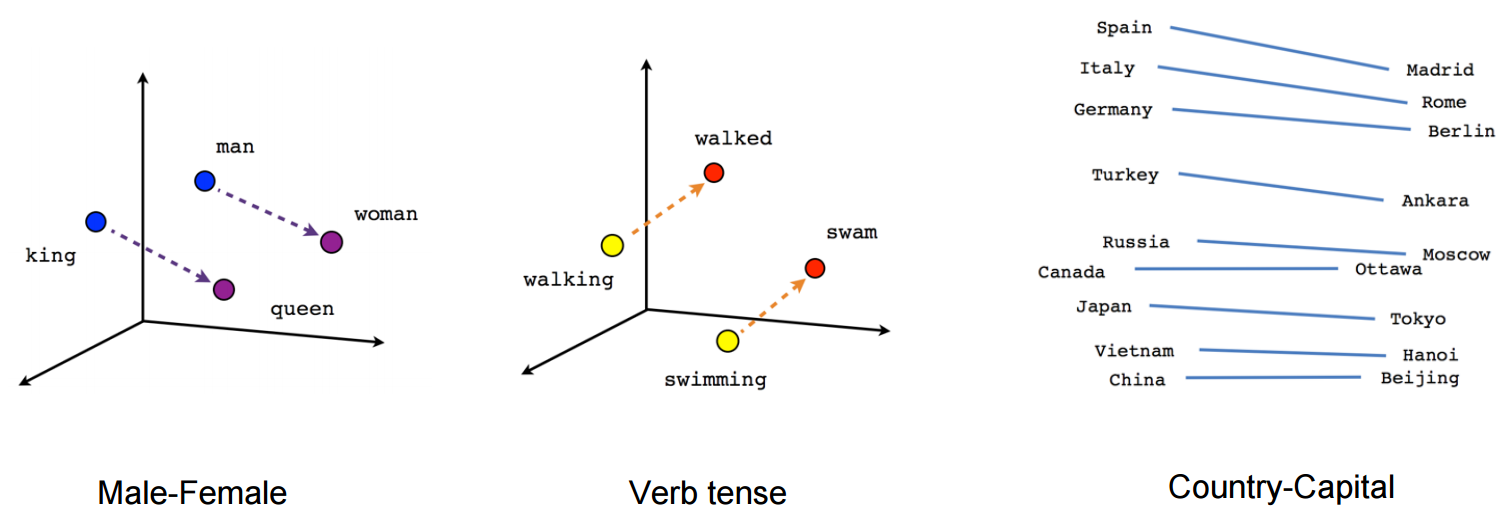

In [52]:
# Document and Word Vectors
Image("../../raw_data/images/man_to_king_w2v.png", width=600)

In [53]:
new_model.wv.accuracy(EVALUATION)

C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  if __name__ == '__main__':
C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
2018-12-05 18:00:56,216 : INFO : capital-common-countries: 0.0% (0/110)
2018-12-05 18:00:58,080 : INFO : capital-world: 0.0% (0/152)
2018-12-05 18:00:58,122 : INFO : currency: 0.0% (0/2)
2018-12-05 18:01:00,677 : INFO : city-in-state: 0.0% (0/212)
2018-12-05 18:01:01,989 : INFO : family: 0.0% (0/110)
2018-12-05 18:01:07,218 : INFO : gram1-adjective-to-adverb: 0.0% (0/420)
2018-12-05 18:01:08,896 : INFO : gram

[{'correct': [],
  'incorrect': [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
   ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
   ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
   ('ATHENS', 'GREECE', 'LONDON', 'ENGLAND'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
   ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
   ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
   ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
   ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'),
   ('BANGKOK', 'THAILAND', 'BERLIN', 'GERMANY'),
   ('BANGKOK', 'THAILAND', 'HELSINKI', 'FINLAND'),
   ('BANGKOK', 'THAILAND', 'LONDON', 'ENGLAND'),
   ('BANGKOK', 'THAILAND', 'MOSCOW', 'RUSSIA'),
   ('BANGKOK', 'THAILAND', 'OSLO', 'NORWAY'),
   ('BANGKOK', 'THAILAND', 'PARIS', 'FRANCE'),
   ('BANGKOK', 'THAILAND', 'ROME', 'ITALY'),
   ('BANGKOK', 'THAILAND', 'STOCKHOLM', 'SWEDEN'),
   ('BANGKOK', 'THAILAND', 'TOKYO', 'JAPAN'),
   ('BANGKOK', 'THAILAND', 'ATHENS', 'GREECE'),
   ('BERLIN', 'GERMANY', 'HELSINKI', 

### FastText

Source: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/FastText_Tutorial.ipynb

##### Subwords
The main principle behind fastText is that the morphological structure of a word carries important information about the meaning of the word, which is not taken into account by traditional word embeddings, which train a unique word embedding for every individual word. This is especially significant for morphologically rich languages (German, Turkish) in which a single word can have a large number of morphological forms, each of which might occur rarely, thus making it hard to train good word embeddings.

FastText attempts to solve this by treating each word as the aggregation of its subwords. For the sake of simplicity and language-independence, subwords are taken to be the character ngrams of the word. The vector for a word is simply taken to be the sum of all vectors of its component char-ngrams.

##### OOV
FastText can be used to obtain vectors for out-of-vocabulary (OOV) words, by summing up vectors for its component char-ngrams, provided at least one of the char-ngrams was present in the training data.

##### fastText = better syntactic; Word2Vec = better semantic
According to a detailed comparison of Word2Vec and FastText in this notebook, fastText does significantly better on syntactic tasks as compared to the original Word2Vec, especially when the size of the training corpus is small. Word2Vec slightly outperforms FastText on semantic tasks though. The differences grow smaller as the size of training corpus increases. 

##### fastText = longer training time
Training time for fastText is significantly higher than the Gensim version of Word2Vec (15min 42s vs 6min 42s on text8, 17 mil tokens, 5 epochs, and a vector size of 100).

SOURCE: [Enriching Word Vectors with Subword Information](https://arxiv.org/pdf/1607.04606.pdf)

In [54]:
from gensim.models.fasttext import FastText

In [44]:
%%time

fasttext = FastText(sentences)
fasttext

2018-12-05 17:46:20,059 : INFO : collecting all words and their counts
2018-12-05 17:46:20,063 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-12-05 17:46:21,915 : INFO : PROGRESS: at sentence #10000, processed 188692 words, keeping 14156 word types
2018-12-05 17:46:22,806 : INFO : PROGRESS: at sentence #20000, processed 377394 words, keeping 19984 word types
2018-12-05 17:46:23,388 : INFO : PROGRESS: at sentence #30000, processed 561041 words, keeping 24222 word types
2018-12-05 17:46:23,995 : INFO : PROGRESS: at sentence #40000, processed 742131 words, keeping 27881 word types
2018-12-05 17:46:24,629 : INFO : PROGRESS: at sentence #50000, processed 917494 words, keeping 31071 word types
2018-12-05 17:46:25,154 : INFO : PROGRESS: at sentence #60000, processed 1103262 words, keeping 34032 word types
2018-12-05 17:46:25,654 : INFO : PROGRESS: at sentence #70000, processed 1293542 words, keeping 36667 word types
2018-12-05 17:46:26,586 : INFO : PROGRESS: a

2018-12-05 17:47:28,744 : INFO : EPOCH 1 - PROGRESS: at 17.91% examples, 86559 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:47:29,857 : INFO : EPOCH 1 - PROGRESS: at 19.31% examples, 87254 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:47:31,005 : INFO : EPOCH 1 - PROGRESS: at 20.28% examples, 85425 words/s, in_qsize 0, out_qsize 1
2018-12-05 17:47:32,127 : INFO : EPOCH 1 - PROGRESS: at 20.86% examples, 82675 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:47:33,140 : INFO : EPOCH 1 - PROGRESS: at 21.68% examples, 81515 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:47:34,217 : INFO : EPOCH 1 - PROGRESS: at 22.80% examples, 81315 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:47:35,322 : INFO : EPOCH 1 - PROGRESS: at 23.83% examples, 80707 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:47:36,404 : INFO : EPOCH 1 - PROGRESS: at 25.03% examples, 80933 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:47:37,472 : INFO : EPOCH 1 - PROGRESS: at 26.41% examples, 81507 words/s, in_qsize 0, out_

2018-12-05 17:48:43,426 : INFO : EPOCH 2 - PROGRESS: at 11.30% examples, 95968 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:48:44,471 : INFO : EPOCH 2 - PROGRESS: at 12.59% examples, 95124 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:48:45,475 : INFO : EPOCH 2 - PROGRESS: at 13.95% examples, 95518 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:48:46,479 : INFO : EPOCH 2 - PROGRESS: at 15.31% examples, 95845 words/s, in_qsize 1, out_qsize 0
2018-12-05 17:48:47,509 : INFO : EPOCH 2 - PROGRESS: at 16.67% examples, 95952 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:48:48,529 : INFO : EPOCH 2 - PROGRESS: at 18.01% examples, 96123 words/s, in_qsize 1, out_qsize 0
2018-12-05 17:48:49,534 : INFO : EPOCH 2 - PROGRESS: at 19.22% examples, 95813 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:48:50,602 : INFO : EPOCH 2 - PROGRESS: at 20.66% examples, 96130 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:48:51,646 : INFO : EPOCH 2 - PROGRESS: at 21.98% examples, 96113 words/s, in_qsize 0, out_

2018-12-05 17:49:57,553 : INFO : EPOCH 3 - PROGRESS: at 10.12% examples, 96335 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:49:58,637 : INFO : EPOCH 3 - PROGRESS: at 11.20% examples, 93067 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:49:59,729 : INFO : EPOCH 3 - PROGRESS: at 12.06% examples, 88886 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:50:00,762 : INFO : EPOCH 3 - PROGRESS: at 12.99% examples, 86754 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:50:01,803 : INFO : EPOCH 3 - PROGRESS: at 14.37% examples, 87566 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:50:02,841 : INFO : EPOCH 3 - PROGRESS: at 15.84% examples, 88874 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:50:03,893 : INFO : EPOCH 3 - PROGRESS: at 17.30% examples, 89906 words/s, in_qsize 1, out_qsize 0
2018-12-05 17:50:04,896 : INFO : EPOCH 3 - PROGRESS: at 18.61% examples, 90591 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:50:05,942 : INFO : EPOCH 3 - PROGRESS: at 19.97% examples, 90911 words/s, in_qsize 0, out_

2018-12-05 17:51:11,217 : INFO : EPOCH 4 - PROGRESS: at 2.83% examples, 98327 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:51:12,275 : INFO : EPOCH 4 - PROGRESS: at 4.35% examples, 99216 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:51:13,302 : INFO : EPOCH 4 - PROGRESS: at 5.75% examples, 98683 words/s, in_qsize 1, out_qsize 0
2018-12-05 17:51:14,385 : INFO : EPOCH 4 - PROGRESS: at 7.29% examples, 98674 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:51:15,502 : INFO : EPOCH 4 - PROGRESS: at 8.89% examples, 98220 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:51:16,522 : INFO : EPOCH 4 - PROGRESS: at 10.36% examples, 98134 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:51:17,524 : INFO : EPOCH 4 - PROGRESS: at 11.85% examples, 99207 words/s, in_qsize 1, out_qsize 0
2018-12-05 17:51:18,571 : INFO : EPOCH 4 - PROGRESS: at 13.32% examples, 99618 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:51:19,600 : INFO : EPOCH 4 - PROGRESS: at 14.70% examples, 99337 words/s, in_qsize 0, out_qsize

2018-12-05 17:52:27,988 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-12-05 17:52:28,017 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-12-05 17:52:28,112 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-12-05 17:52:28,113 : INFO : EPOCH - 4 : training on 9130614 raw words (6980823 effective words) took 79.0s, 88378 effective words/s
2018-12-05 17:52:29,211 : INFO : EPOCH 5 - PROGRESS: at 1.13% examples, 77305 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:52:30,258 : INFO : EPOCH 5 - PROGRESS: at 2.30% examples, 78561 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:52:31,321 : INFO : EPOCH 5 - PROGRESS: at 3.47% examples, 78685 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:52:32,344 : INFO : EPOCH 5 - PROGRESS: at 4.90% examples, 83133 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:52:33,439 : INFO : EPOCH 5 - PROGRESS: at 6.08% examples, 81902 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:52:34,610 : INFO : EP

2018-12-05 17:53:42,855 : INFO : EPOCH 5 - PROGRESS: at 95.65% examples, 89676 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:53:43,957 : INFO : EPOCH 5 - PROGRESS: at 97.22% examples, 89656 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:53:45,007 : INFO : EPOCH 5 - PROGRESS: at 98.94% examples, 89897 words/s, in_qsize 0, out_qsize 0
2018-12-05 17:53:45,592 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-12-05 17:53:45,602 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-12-05 17:53:45,682 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-12-05 17:53:45,683 : INFO : EPOCH - 5 : training on 9130614 raw words (6980247 effective words) took 77.6s, 89998 effective words/s
2018-12-05 17:53:45,685 : INFO : training on a 45653070 raw words (34902447 effective words) took 391.7s, 89100 effective words/s


Wall time: 7min 27s


In [45]:
fasttext.wv.accuracy(EVALUATION)

C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  if __name__ == '__main__':
2018-12-05 17:53:47,926 : INFO : precomputing L2-norms of word weight vectors
2018-12-05 17:53:47,973 : INFO : precomputing L2-norms of ngram weight vectors
C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
2018-12-05 17:53:48,775 : INFO : capital-common-countries: 0.0% (0/110)
2018-12-05 17:53:49,690 : INFO : capital-world: 1.3% (2/152)
2018-12-05 17:53:49,708 : INFO : currency: 0.0% (0/2)
2018-12-05 17:53:50,866 : INFO : city-in-state: 0.5% (1/212)
2018-12

[{'correct': [],
  'incorrect': [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
   ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
   ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
   ('ATHENS', 'GREECE', 'LONDON', 'ENGLAND'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
   ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
   ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
   ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
   ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'),
   ('BANGKOK', 'THAILAND', 'BERLIN', 'GERMANY'),
   ('BANGKOK', 'THAILAND', 'HELSINKI', 'FINLAND'),
   ('BANGKOK', 'THAILAND', 'LONDON', 'ENGLAND'),
   ('BANGKOK', 'THAILAND', 'MOSCOW', 'RUSSIA'),
   ('BANGKOK', 'THAILAND', 'OSLO', 'NORWAY'),
   ('BANGKOK', 'THAILAND', 'PARIS', 'FRANCE'),
   ('BANGKOK', 'THAILAND', 'ROME', 'ITALY'),
   ('BANGKOK', 'THAILAND', 'STOCKHOLM', 'SWEDEN'),
   ('BANGKOK', 'THAILAND', 'TOKYO', 'JAPAN'),
   ('BANGKOK', 'THAILAND', 'ATHENS', 'GREECE'),
   ('BERLIN', 'GERMANY', 'HELSINKI', 

In [56]:
fasttext.most_similar(positive=['disease'], topn=10)

C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('diseases', 0.8974713683128357),
 ('diseased', 0.8493967056274414),
 ('pathosis', 0.751259982585907),
 ('pneumopathy', 0.7297288179397583),
 ('enteropathy', 0.7289791107177734),
 ('kyphosis', 0.7175432443618774),
 ('symbiosis', 0.7125497460365295),
 ('disengagement', 0.7113731503486633),
 ('angiitis', 0.7097072601318359),
 ('ophthalmopathy', 0.7082532048225403)]

##### Custom Embeddings

Biomedical word embeddings: English word embeddings pre-trained on biomedical texts from MEDLINE®/PubMed® using the Word2Vec implementation of the gensim toolkit

- [Biomedical word embeddings](http://nlp.cs.aueb.gr/software.html)

In [57]:
PRETRAINED_BIOMEDICAL_EMBEDDINGS

'C:\\Users\\alsherman\\Desktop\\NLP\\nlp_practicum_health\\raw_data\\embeddings\\pubmed2018_w2v_200D\\pubmed2018_w2v_200D.bin'

In [58]:
from gensim.models.keyedvectors import KeyedVectors

bio_model = KeyedVectors.load_word2vec_format(
      PRETRAINED_BIOMEDICAL_EMBEDDINGS
    , binary=True
)

2018-12-05 18:02:39,930 : INFO : loading projection weights from C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\pubmed2018_w2v_200D\pubmed2018_w2v_200D.bin
2018-12-05 18:03:25,612 : INFO : loaded (2665547, 200) matrix from C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\pubmed2018_w2v_200D\pubmed2018_w2v_200D.bin


In [59]:
bio_model.wv.accuracy(EVALUATION)

C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  if __name__ == '__main__':
2018-12-05 18:03:25,662 : INFO : precomputing L2-norms of word weight vectors
C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
2018-12-05 18:03:46,934 : INFO : capital-common-countries: 77.6% (121/156)
2018-12-05 18:03:48,082

[{'correct': [('BANGKOK', 'THAILAND', 'BEIJING', 'CHINA'),
   ('BANGKOK', 'THAILAND', 'BERLIN', 'GERMANY'),
   ('BANGKOK', 'THAILAND', 'HELSINKI', 'FINLAND'),
   ('BANGKOK', 'THAILAND', 'LONDON', 'ENGLAND'),
   ('BANGKOK', 'THAILAND', 'MADRID', 'SPAIN'),
   ('BANGKOK', 'THAILAND', 'PARIS', 'FRANCE'),
   ('BANGKOK', 'THAILAND', 'ROME', 'ITALY'),
   ('BANGKOK', 'THAILAND', 'TEHRAN', 'IRAN'),
   ('BANGKOK', 'THAILAND', 'TOKYO', 'JAPAN'),
   ('BEIJING', 'CHINA', 'BERLIN', 'GERMANY'),
   ('BEIJING', 'CHINA', 'HELSINKI', 'FINLAND'),
   ('BEIJING', 'CHINA', 'LONDON', 'ENGLAND'),
   ('BEIJING', 'CHINA', 'MADRID', 'SPAIN'),
   ('BEIJING', 'CHINA', 'MOSCOW', 'RUSSIA'),
   ('BEIJING', 'CHINA', 'PARIS', 'FRANCE'),
   ('BEIJING', 'CHINA', 'ROME', 'ITALY'),
   ('BEIJING', 'CHINA', 'STOCKHOLM', 'SWEDEN'),
   ('BEIJING', 'CHINA', 'TEHRAN', 'IRAN'),
   ('BEIJING', 'CHINA', 'TOKYO', 'JAPAN'),
   ('BEIJING', 'CHINA', 'BANGKOK', 'THAILAND'),
   ('BERLIN', 'GERMANY', 'HELSINKI', 'FINLAND'),
   ('BERLIN', '

### Doc2Vec

Doc2vec (aka paragraph2vec, aka sentence embeddings) modifies the word2vec algorithm to unsupervised learning of continuous representations for larger blocks of text, such as sentences, paragraphs or entire documents.

##### Paragraph Vector - Distributed Memory (PV-DM)
This is the Paragraph Vector model analogous to Continuous-bag-of-words Word2vec. The paragraph vectors are obtained by training a neural network on the fake task of inferring a center word based on context words and a context paragraph. A paragraph is a context for all words in the paragraph, and a word in a paragraph can have that paragraph as a context.

##### Paragraph Vector - Distributed Bag of Words (PV-DBOW)
This is the Paragraph Vector model analogous to Skip-gram Word2vec. The paragraph vectors are obtained by training a neural network on the fake task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

Paragraph Vector, aka gensim Doc2Vec
The straightforward approach of averaging each of a text's words' word-vectors creates a quick and crude document-vector that can often be useful. However, Le and Mikolov in 2014 introduced the Paragraph Vector, which usually outperforms such simple-averaging.

SOURCE: 
- [Doc2vec tutorial](https://rare-technologies.com/doc2vec-tutorial/)
- [Distributed Representations of Sentences and Documents:](https://cs.stanford.edu/~quocle/paragraph_vector.pdf)
- [Representations for Language: From Word Embeddings to Sentence Meanings
](https://nlp.stanford.edu/manning/talks/Simons-Institute-Manning-2017.pdf)
- [A gentle introduction to Doc2Vec](https://medium.com/scaleabout/a-gentle-introduction-to-doc2vec-db3e8c0cce5e)
- [Gensim Doc2vec Tutorial on the IMDB Sentiment Dataset](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/doc2vec-IMDB.ipynb)

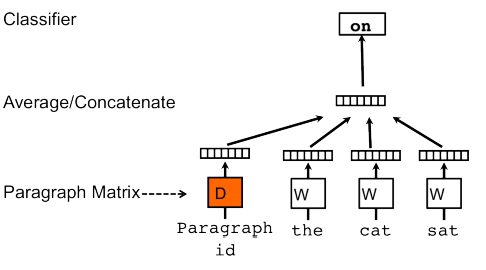

In [60]:
# Paragraph Vector - Distributed Memory (PV_DM) Model 
Image("../../raw_data/images/pv_dm.png", width=600)

In [63]:
# Note pandas can read data from a zip file without unzipping it
REPORTER_ZIP_PATH

'C:\\Users\\alsherman\\Desktop\\NLP\\nlp_practicum_health\\raw_data\\pubmed\\RePORTER_PRJ_C_FY2017.zip'

In [64]:
cols = ['PROJECT_TITLE','IC_NAME']
reporter = pd.read_csv(REPORTER_ZIP_PATH, encoding='latin', usecols=cols)
reporter.dropna(inplace=True)
reporter.head()

,IC_NAME,PROJECT_TITLE
0,NATIONAL INSTITUTE OF MENTAL HEALTH,"Autism Genetics, Phase II: Increasing Represen..."
1,NATIONAL CANCER INSTITUTE,The Role of the Microenvironment in Barrett's ...
2,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,Low-Cost Catalytic Biomass Cookstove for Impro...
3,NATIONAL INSTITUTE OF GENERAL MEDICAL SCIENCES,Surgical Wound Closure Matrices for the Preven...
4,NATIONAL CANCER INSTITUTE,LRBGE Optical Microscopy Core


In [65]:
reporter.IC_NAME.value_counts()[0:10]

NATIONAL CANCER INSTITUTE                                                        11406
NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS DISEASES                             7744
NATIONAL INSTITUTE OF GENERAL MEDICAL SCIENCES                                    7587
NATIONAL HEART, LUNG, AND BLOOD INSTITUTE                                         6456
NATIONAL INSTITUTE OF DIABETES AND DIGESTIVE AND KIDNEY DISEASES                  5051
NATIONAL INSTITUTE OF NEUROLOGICAL DISORDERS AND STROKE                           4591
NATIONAL INSTITUTE ON AGING                                                       3928
NATIONAL INSTITUTE OF MENTAL HEALTH                                               3515
EUNICE KENNEDY SHRIVER NATIONAL INSTITUTE OF CHILD HEALTH & HUMAN DEVELOPMENT     3375
NATIONAL INSTITUTE ON DRUG ABUSE                                                  2569
Name: IC_NAME, dtype: int64

In [66]:
# filter the reporter dataset to the top institutes
frequent_institutes = reporter.IC_NAME.value_counts().index[0:3]
reporter = reporter[reporter.IC_NAME.isin(frequent_institutes)]

In [67]:
from smart_open import smart_open, os

class MyDocument(object):
    def __init__(self, df):
        self.df = df

    def __iter__(self):
        for ind, row in self.df.iterrows():
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(row['PROJECT_TITLE']), row['IC_NAME'])

train_corpus = MyDocument(reporter)

In [68]:
for title, institute in train_corpus:
    print(institute)
    print(title)
    break

NATIONAL CANCER INSTITUTE
['the', 'role', 'of', 'the', 'in', 'barrett', 'esophagus']


In [69]:
from gensim.models import doc2vec

d2v = doc2vec.Doc2Vec(
      vector_size=400
    , epochs=20
    , dm=0
)

print(d2v)

Doc2Vec(dbow,d400,n5,mc5,s0.001,t3)


In [70]:
d2v.build_vocab(train_corpus)

In [71]:
%%time 
d2v.train(train_corpus, total_examples=d2v.corpus_count, epochs=d2v.epochs)

Wall time: 10min 15s


In [72]:
# OPTIONAL - update the learning rate at each iteration

# set as true to run
if 1 == 0:
    d2v = doc2vec.Doc2Vec(alpha=0.025, min_alpha=0.025)
    d2v.build_vocab(train_corpus)

    for epoch in range(2):
        d2v.train(train_corpus, total_examples=d2v.corpus_count, epochs=1)
        d2v.alpha -= 0.002  # decrease the learning rate
        d2v.min_alpha = d2v.alpha  # fix the learning rate, no decay

In [69]:
# save a doc2vec model
#d2v.save(DOC2VEC_SAVED_EMBEDDINGS_PATH)
d2v = gensim.models.Word2Vec.load(DOC2VEC_SAVED_EMBEDDINGS_PATH)  # open the model

2018-12-05 18:05:28,264 : INFO : loading Word2Vec object from C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_docx_embeddings.bin
2018-12-05 18:05:28,427 : INFO : loading trainables recursively from C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_docx_embeddings.bin.trainables.* with mmap=None
2018-12-05 18:05:28,428 : INFO : loading vocabulary recursively from C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_docx_embeddings.bin.vocabulary.* with mmap=None
2018-12-05 18:05:28,429 : INFO : loading docvecs recursively from C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_docx_embeddings.bin.docvecs.* with mmap=None
2018-12-05 18:05:28,429 : INFO : loading wv recursively from C:\Users\alsherman\Desktop\NLP\nlp_practicum_health\raw_data\embeddings\saved_docx_embeddings.bin.wv.* with mmap=None
2018-12-05 18:05:28,431 : INFO : loaded C:\Users\alsherman\Desktop\NLP\nlp_practic

Inferring a Vector
One important thing to note is that you can now infer a vector for any piece of text without having to re-train the model by passing a list of words to the model.infer_vector function. This vector can then be compared with other vectors via cosine similarity.

In [70]:
# view a document vector
d2v.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])

array([ 6.28021881e-02, -3.03164795e-02,  4.57351021e-02,  2.85042659e-03,
        1.35119602e-01, -4.63832840e-02,  1.99678279e-02, -7.25254118e-02,
       -1.64783414e-05,  9.07608029e-03, -1.11780576e-02,  6.34321570e-02,
        6.52335882e-02, -7.74311349e-02, -2.39509139e-02, -4.53182235e-02,
        2.21119653e-02,  3.15943398e-02,  4.65844534e-02,  8.04248545e-03,
        1.32305967e-02, -3.97624588e-03,  2.94771846e-02,  1.20964693e-02,
        1.42000075e-02, -1.64598115e-02, -3.91684361e-02, -4.20535877e-02,
       -8.75197947e-02,  5.37384152e-02,  1.22027934e-01, -2.69703218e-03,
       -5.98898642e-02, -4.77754250e-02,  1.16501357e-02,  5.88844828e-02,
       -5.56616224e-02, -1.20069757e-02, -1.44422911e-02,  1.32014165e-02,
        1.48653379e-02,  4.82960418e-02,  1.18477449e-01, -6.21213168e-02,
       -6.14982331e-03, -1.19606601e-02, -5.43186767e-03, -4.52835597e-02,
       -1.15716405e-01, -8.39516819e-02, -1.45170251e-02, -1.62963215e-02,
       -6.44158795e-02,  

In [71]:
# apply the doc2vec model to every title
reporter['d2v_vector'] = reporter['PROJECT_TITLE'].apply(d2v.infer_vector)
reporter.head()

,IC_NAME,PROJECT_TITLE,d2v_vector
1,NATIONAL CANCER INSTITUTE,The Role of the Microenvironment in Barrett's ...,"[0.00011367954, -0.0006990025, -0.0012077373, ..."
3,NATIONAL INSTITUTE OF GENERAL MEDICAL SCIENCES,Surgical Wound Closure Matrices for the Preven...,"[-0.00080058654, 0.0006025835, 0.00048562177, ..."
4,NATIONAL CANCER INSTITUTE,LRBGE Optical Microscopy Core,"[-0.00059612124, 0.00052445946, -0.00020209307..."
12,NATIONAL CANCER INSTITUTE,Targeting Mdm2-MdmX E3 Ligase for Treatment of...,"[-3.536602e-05, -0.0006210681, -0.0012436996, ..."
18,NATIONAL CANCER INSTITUTE,Atypical Chemokine Receptor 4 (ACKR4) in Anti-...,"[0.00060234626, 0.00034988674, 0.00013099592, ..."


In [72]:
# extract each dimension into a separate column
inferred_vectors = [vec for vec in reporter['d2v_vector']]
vectors_df = pd.DataFrame(inferred_vectors)

vectors_df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.000114,-0.000699,-0.001208,-0.000165,0.000536,0.000221,0.001049,-0.000791,-0.000478,0.000768,...,-0.000254,-0.000592,-0.000512,0.000948,-0.000289,0.001101,0.000987,-0.000253,0.000481,-0.000073
1,-0.000801,0.000603,0.000486,0.000347,-0.001098,-0.001035,-0.000331,-0.000323,-0.001166,0.001169,...,-0.000641,-0.000476,0.000304,-0.000922,0.001116,0.001240,0.000941,0.000454,0.001197,-0.000205
2,-0.000596,0.000524,-0.000202,0.000708,0.000845,-0.000943,0.000324,-0.000410,-0.000311,-0.000120,...,0.000103,0.000730,-0.000843,-0.000031,-0.000249,-0.000308,-0.000415,0.000914,0.000866,-0.000913
3,-0.000035,-0.000621,-0.001244,0.000625,0.000084,-0.000400,0.000122,-0.000555,0.000709,-0.001152,...,-0.000482,0.000349,0.000548,-0.000953,-0.000418,-0.000334,0.000213,-0.000057,0.000682,0.000274
4,0.000602,0.000350,0.000131,0.000938,0.000632,0.000124,0.000482,-0.000932,-0.000739,-0.000632,...,0.000831,0.001061,-0.000156,-0.001117,-0.000469,0.001061,0.000612,-0.000850,-0.001013,0.000165


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

labels, uniques = pd.factorize(reporter['IC_NAME'])
y = labels 
X = vectors_df

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = RandomForestClassifier(n_estimators=100, verbose=2, n_jobs=-1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

building tree 1 of 100building tree 2 of 100building tree 3 of 100building tree 4 of 100



building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100building tree 19 of 100

building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.5s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.1s finished
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [74]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.46      0.87      0.60      2901
          1       0.50      0.16      0.24      1899
          2       0.41      0.14      0.20      1885

avg / total       0.46      0.46      0.39      6685



### Category2Vec

SOURCE: 
- [Recommender System with Distributed Representation](https://www.slideshare.net/rakutentech/recommender-system-with-distributed-representation)
- [CAT2VEC: LEARNING DISTRIBUTED REPRESENTATION OF MULTI-FIELD CATEGORICAL DATA:](https://openreview.net/pdf?id=HyNxRZ9xg)


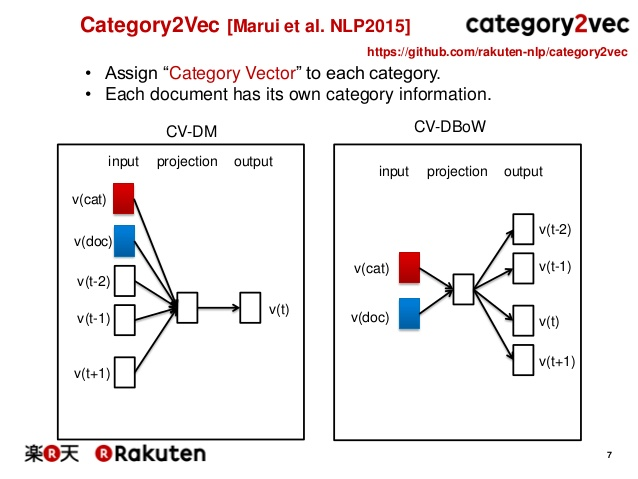

In [75]:
# Paragraph Vector - Distributed Memory (PV_DM) Model 
Image("../../raw_data/images/category2vec_architecture.jpg", width=400)

Resources to create content:
- [Word embeddings: exploration, explanation, and exploitation (with code in Python)](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795)
- [The amazing power of word vectors](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)
- [Don’tcount,predict! Asystematiccomparisonof context-countingvs.context-predictingsemanticvectors
](http://clic.cimec.unitn.it/marco/publications/acl2014/baroni-etal-countpredict-acl2014.pdf)
- [An Intuitive Understanding of Word Embeddings: From Count Vectors to Word2Vec](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)
- [Taming Text with the SVD](ftp://ftp.sas.com/techsup/download/EMiner/TamingTextwiththeSVD.pdf)